In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



df = pd.read_csv('vgsales.csv')

In [14]:
sales = pd.read_csv('vgsales.csv')

In [15]:
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [17]:
sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [18]:
column = df['NA_Sales']

# 1. Mean
mean_value = column.mean()
print(f"Mean: {mean_value}")

# 2. Standard Deviation
std_dev = column.std()
print(f"Standard Deviation: {std_dev}")

# 3. Minimum
min_value = column.min()
print(f"Minimum: {min_value}")

# 4. Maximum
max_value = column.max()
print(f"Maximum: {max_value}")

# 5. Median
median_value = column.median()
print(f"Median: {median_value}")

Mean: 0.26466742981082064
Standard Deviation: 0.8166830292988796
Minimum: 0.0
Maximum: 41.49
Median: 0.08


In [19]:
column = df['EU_Sales']

# 1. Mean
mean_value = column.mean()
print(f"Mean: {mean_value}")

# 2. Standard Deviation
std_dev = column.std()
print(f"Standard Deviation: {std_dev}")

# 3. Minimum
min_value = column.min()
print(f"Minimum: {min_value}")

# 4. Maximum
max_value = column.max()
print(f"Maximum: {max_value}")

# 5. Median
median_value = column.median()
print(f"Median: {median_value}")

Mean: 0.14665200626581515
Standard Deviation: 0.5053512312869116
Minimum: 0.0
Maximum: 29.02
Median: 0.02


In [20]:
column = df['JP_Sales']

# 1. Mean
mean_value = column.mean()
print(f"Mean: {mean_value}")

# 2. Standard Deviation
std_dev = column.std()
print(f"Standard Deviation: {std_dev}")

# 3. Minimum
min_value = column.min()
print(f"Minimum: {min_value}")

# 4. Maximum
max_value = column.max()
print(f"Maximum: {max_value}")

# 5. Median
median_value = column.median()
print(f"Median: {median_value}")

Mean: 0.077781660441017
Standard Deviation: 0.30929064808220297
Minimum: 0.0
Maximum: 10.22
Median: 0.0


In [21]:
column = df['Global_Sales']

# 1. Mean
mean_value = column.mean()
print(f"Mean: {mean_value}")

# 2. Standard Deviation
std_dev = column.std()
print(f"Standard Deviation: {std_dev}")

# 3. Minimum
min_value = column.min()
print(f"Minimum: {min_value}")

# 4. Maximum
max_value = column.max()
print(f"Maximum: {max_value}")

# 5. Median
median_value = column.median()
print(f"Median: {median_value}")

Mean: 0.5374406555006628
Standard Deviation: 1.5550279355699124
Minimum: 0.01
Maximum: 82.74
Median: 0.17


In [22]:
sales.NA_Sales = sales.NA_Sales.astype(int)
sales.EU_Sales = sales.EU_Sales.astype(int)
sales.JP_Sales = sales.JP_Sales.astype(int)
sales.Other_Sales = sales.Other_Sales.astype(int)
sales.Global_Sales = sales.Global_Sales.astype(int)
sales.Global_Sales = sales.Global_Sales.astype(int)
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41,29,3,8,82
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29,3,6,0,40
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15,12,3,3,35
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15,11,3,2,33
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11,8,10,1,31


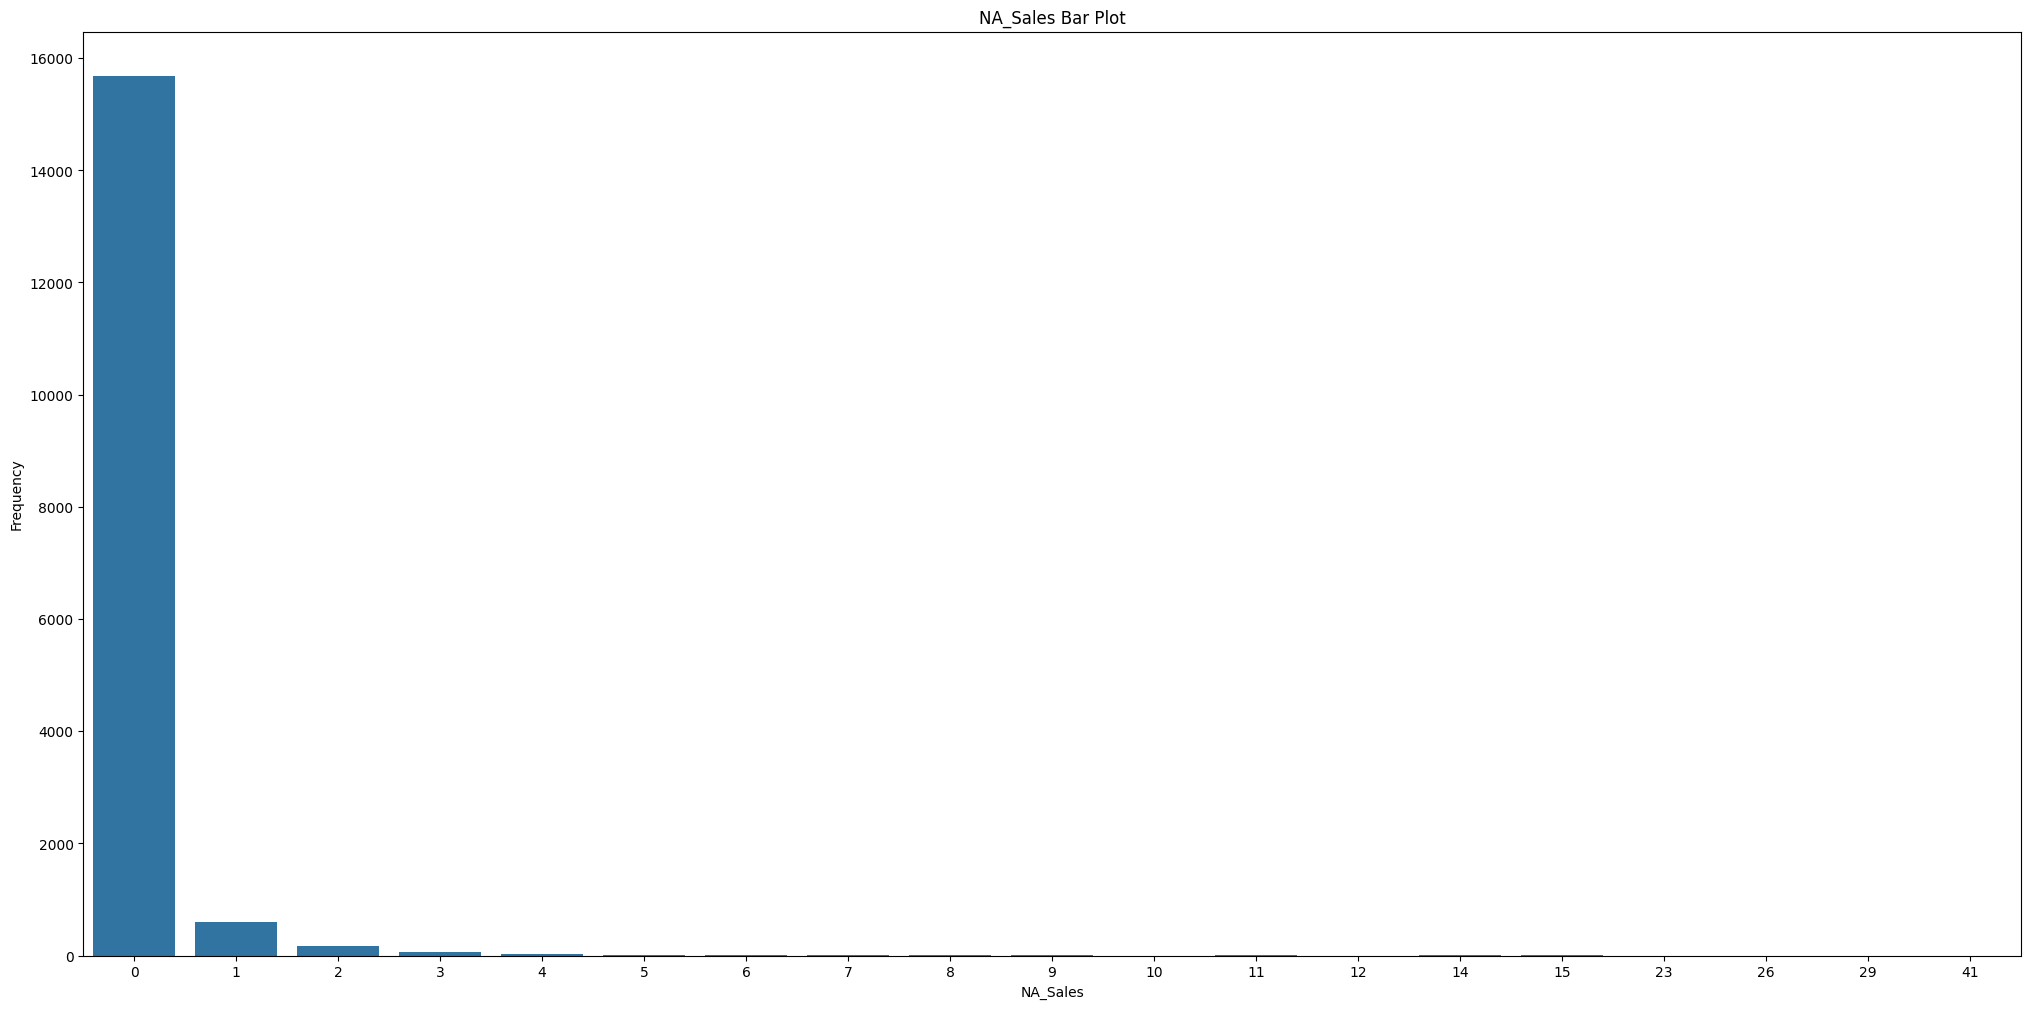

In [23]:
plt.figure(figsize = (25,12))
sns.barplot(x = sales['NA_Sales'].value_counts().index,
           y=sales['NA_Sales'].value_counts().values)
plt.xlabel('NA_Sales')
plt.ylabel('Frequency')
plt.title('NA_Sales Bar Plot')
plt.show()

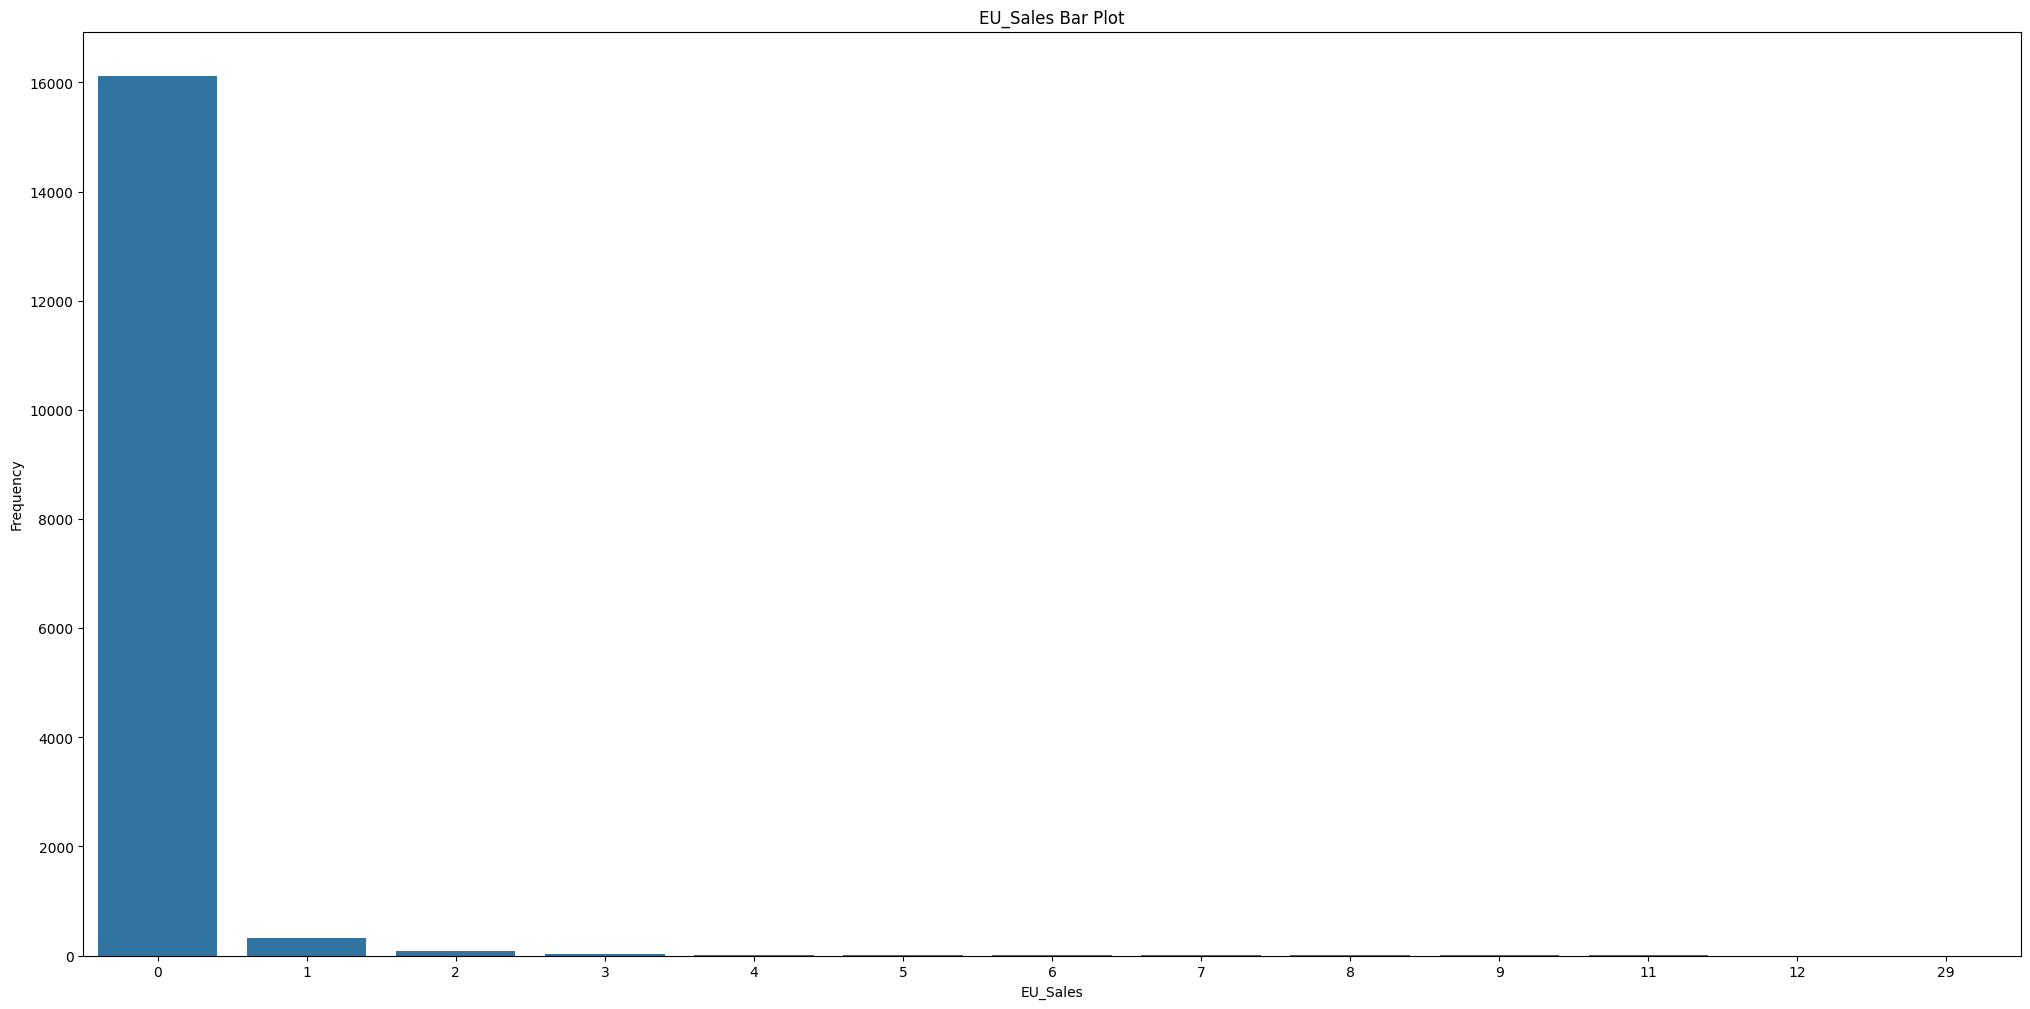

In [24]:
plt.figure(figsize = (25,12))
sns.barplot(x = sales['EU_Sales'].value_counts().index,
           y=sales['EU_Sales'].value_counts().values)
plt.xlabel('EU_Sales')
plt.ylabel('Frequency')
plt.title('EU_Sales Bar Plot')
plt.show()

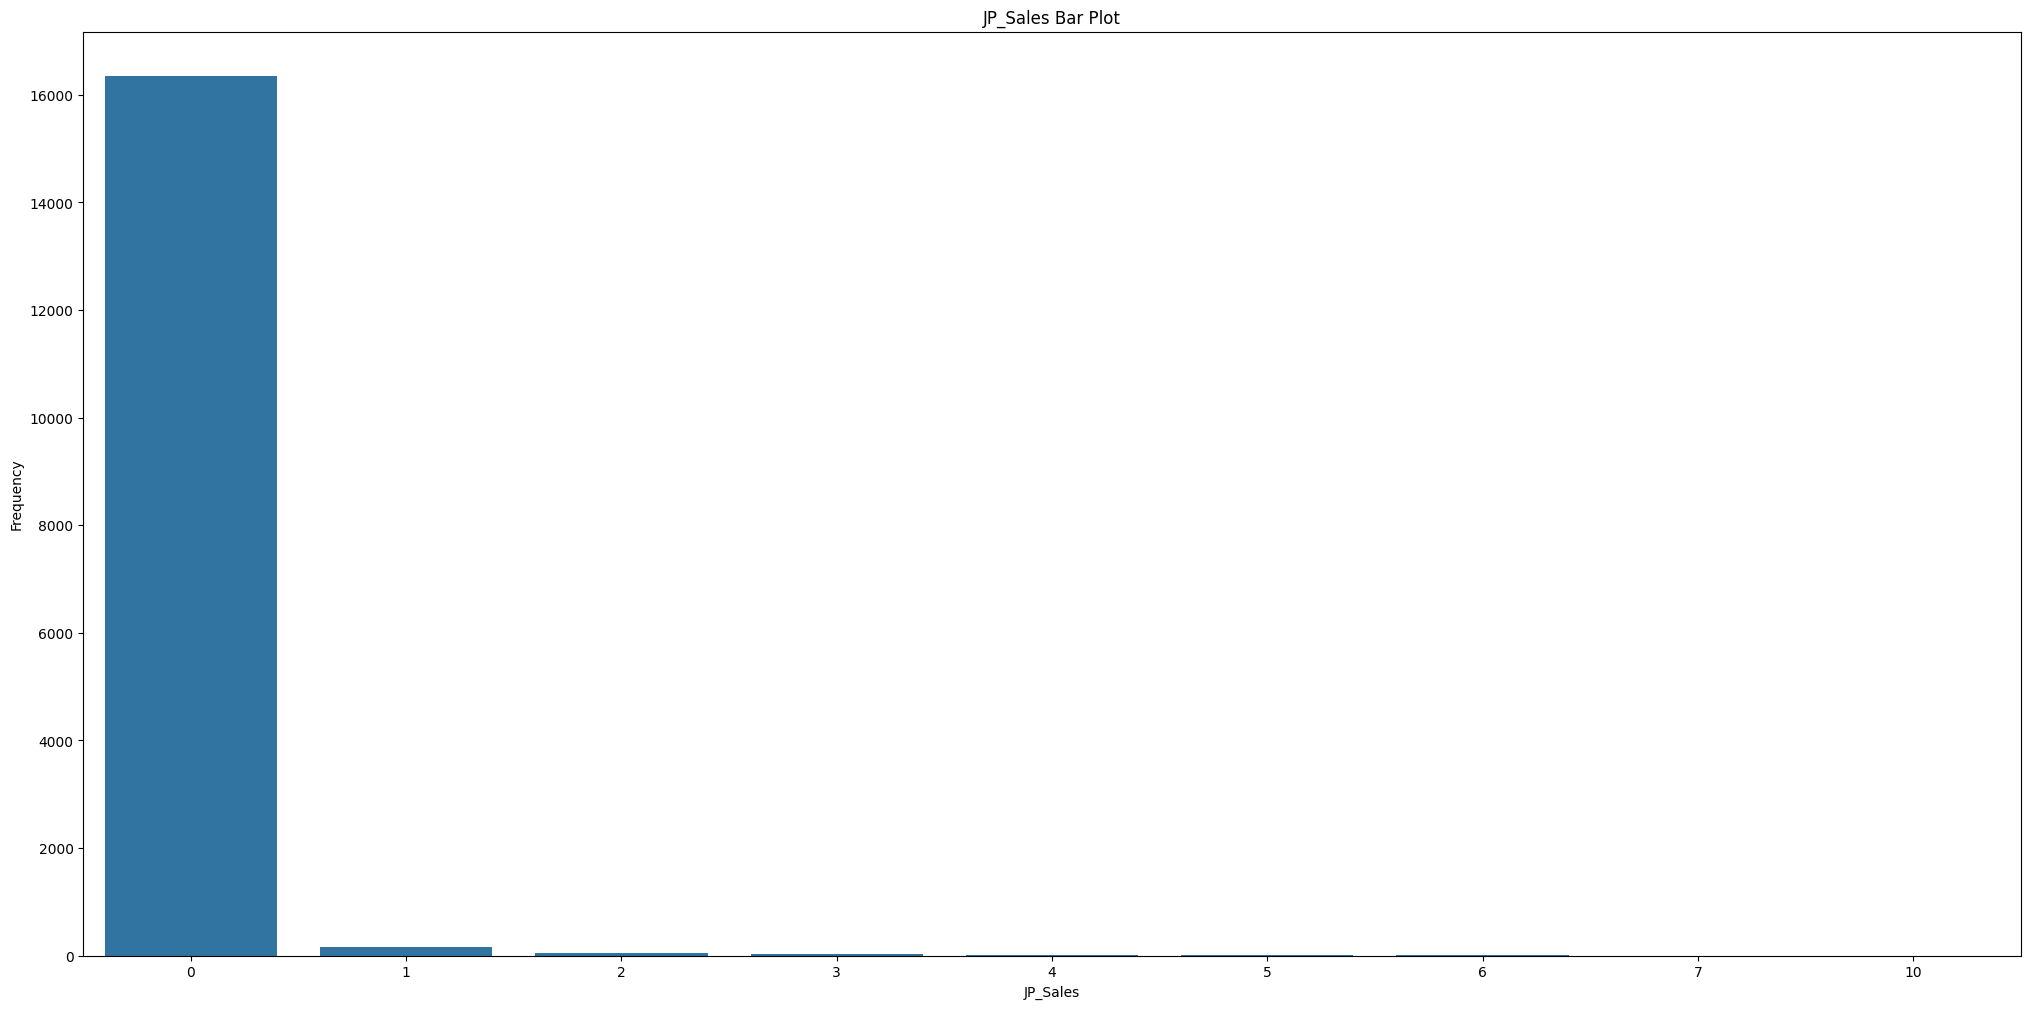

In [25]:
plt.figure(figsize = (25,12))
sns.barplot(x = sales['JP_Sales'].value_counts().index,
           y=sales['JP_Sales'].value_counts().values)
plt.xlabel('JP_Sales')
plt.ylabel('Frequency')
plt.title('JP_Sales Bar Plot')
plt.show()

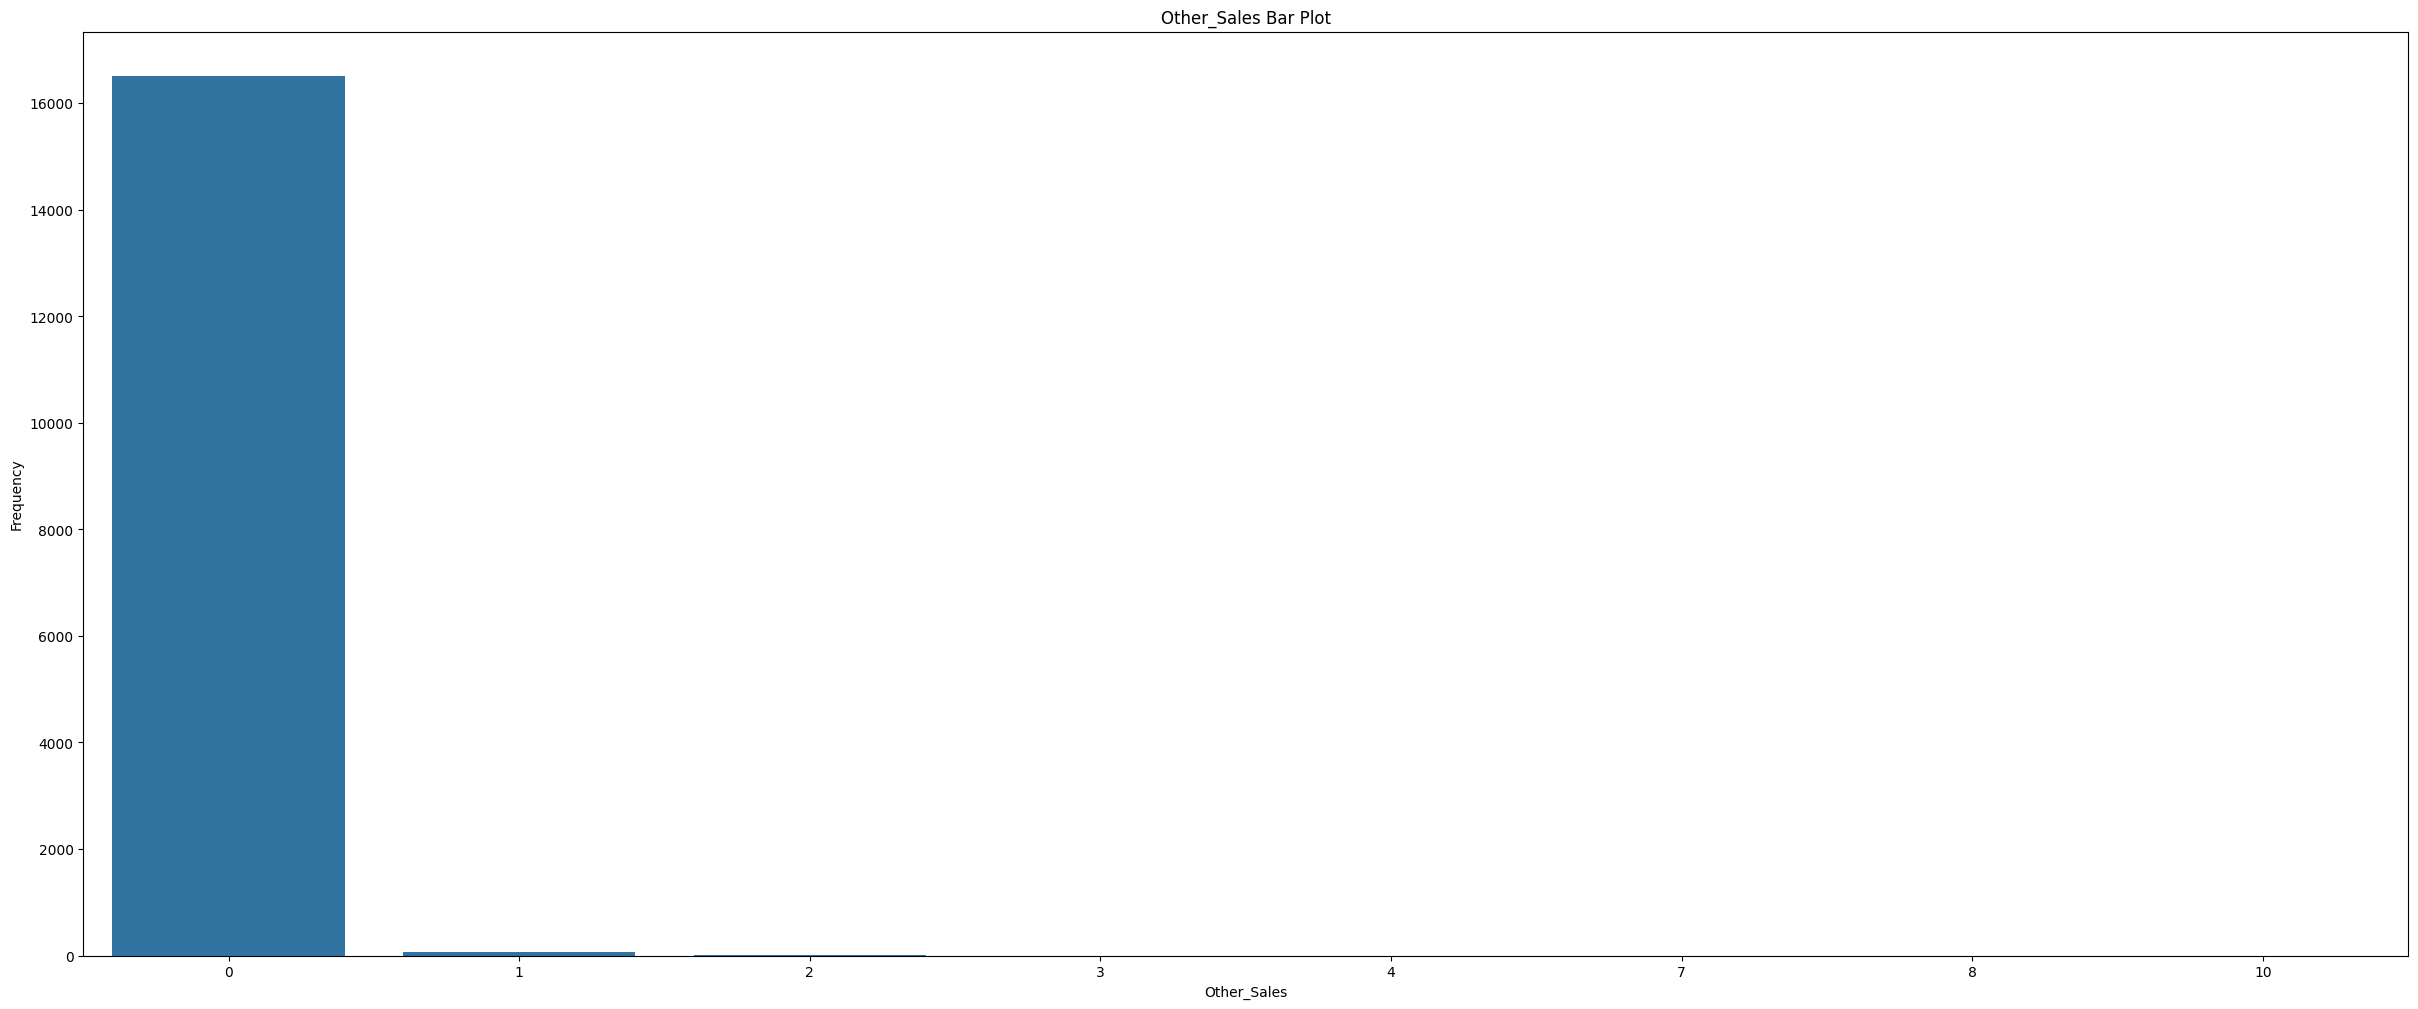

In [26]:
plt.figure(figsize = (30,12))
sns.barplot(x = sales['Other_Sales'].value_counts().index,
           y=sales['Other_Sales'].value_counts().values)
plt.xlabel('Other_Sales')
plt.ylabel('Frequency')
plt.title('Other_Sales Bar Plot')
plt.show()

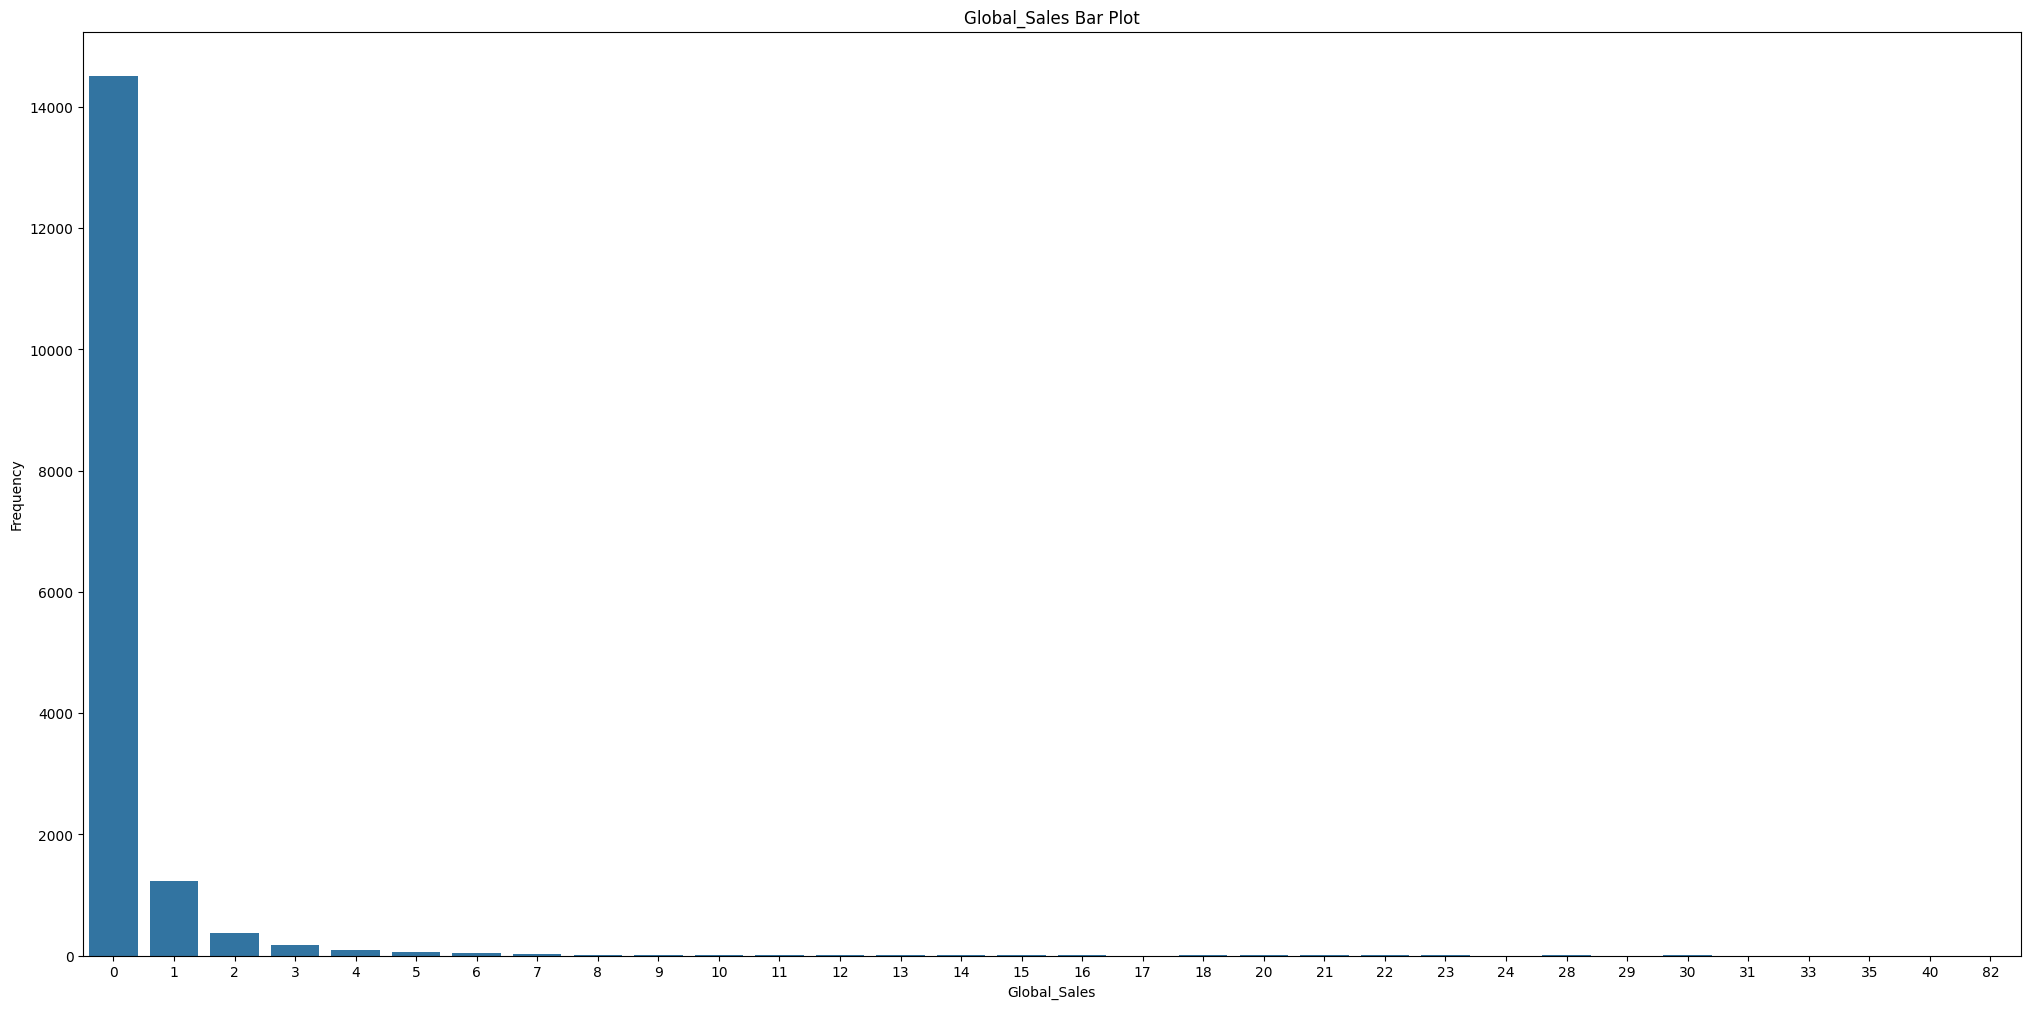

In [27]:
plt.figure(figsize = (25,12))
sns.barplot(x = sales['Global_Sales'].value_counts().index,
           y=sales['Global_Sales'].value_counts().values)
plt.xlabel('Global_Sales')
plt.ylabel('Frequency')
plt.title('Global_Sales Bar Plot')
plt.show()

In [28]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  int64  
 7   EU_Sales      16598 non-null  int64  
 8   JP_Sales      16598 non-null  int64  
 9   Other_Sales   16598 non-null  int64  
 10  Global_Sales  16598 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 1.4+ MB


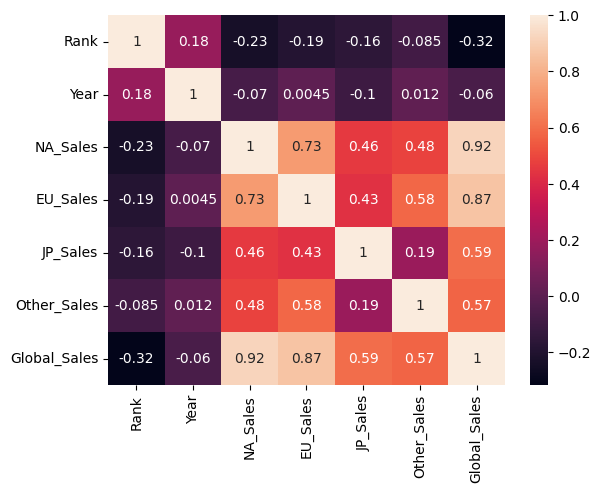

In [29]:
# Select only numeric columns
numeric_sales = sales.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
sns.heatmap(numeric_sales.corr(), annot=True)
plt.show()


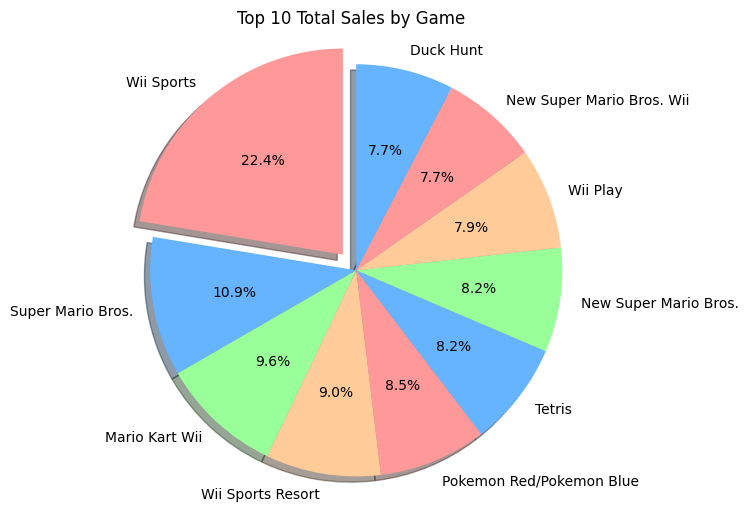

In [49]:
# Extract labels (Names of games) and sizes (Total sales for each game)
labels = sales['Name'].head(10)
sizes = sales['Global_Sales'].head(10)

# 'Explode' the first slice only
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = [0.1] + [0] * (len(labels) - 1) # 'Explode' the first slice only

# Creating the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Display the chart
plt.title('Top 10 Total Sales by Game')
plt.show()

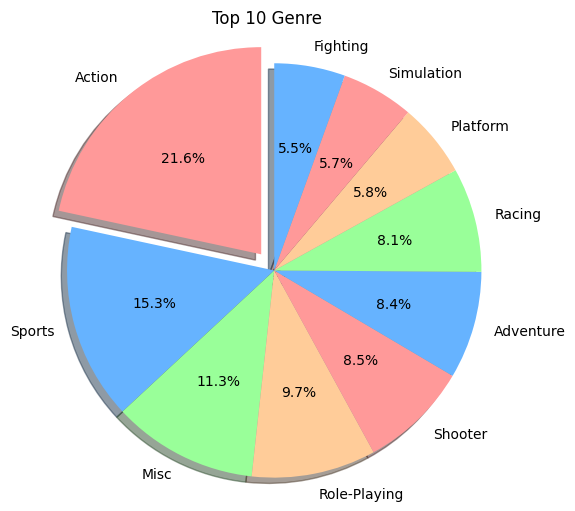

In [52]:
# Extract genre name and value
genre = sales['Genre'].value_counts()
genre_count = genre.head(10)

labels = genre_count.index
sizes = genre_count.values

# 'Explode' the first slice only
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = [0.1] + [0] * (len(labels) - 1) # 'Explode' the first slice only

# Creating the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Display the chart
plt.title('Top 10 Genre ')
plt.show()

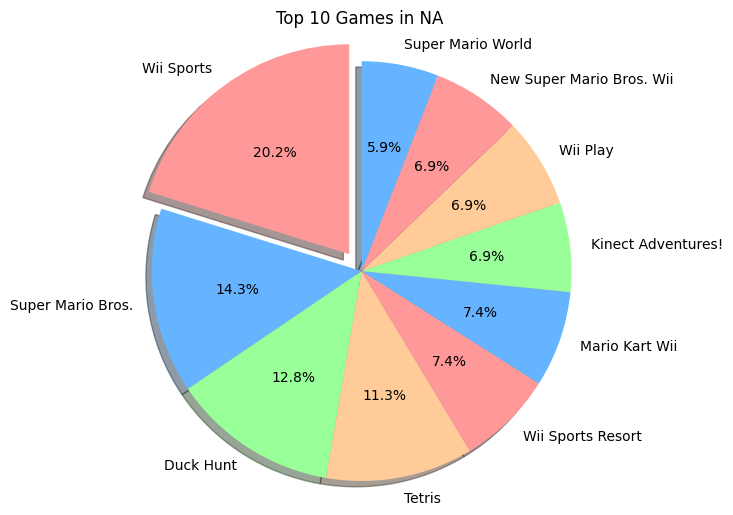

In [60]:
# Extract labels (Names of games) and sizes (Total sales for each game)
top10_na_sales = sales[['Name', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False).head(10)

labels = top10_na_sales['Name']
sizes = top10_na_sales['NA_Sales']

# 'Explode' the first slice only
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = [0.1] + [0] * (len(labels) - 1) # 'Explode' the first slice only

# Creating the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Display the chart
plt.title('Top 10 Games in NA')
plt.show()# Extract labels (Names of games) and sizes (Total sales for each game)


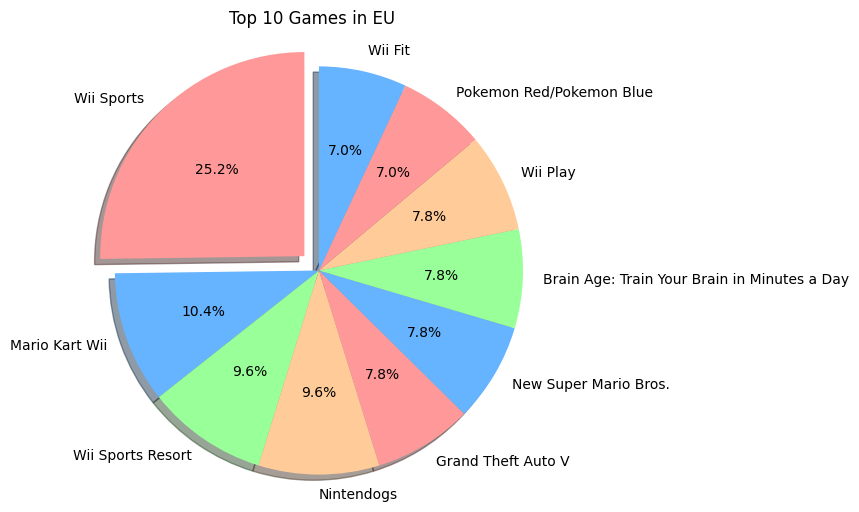

In [62]:
# Extract labels (Names of games) and sizes (Total sales for each game)
top10_na_sales = sales[['Name', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False).head(10)

labels = top10_na_sales['Name']
sizes = top10_na_sales['EU_Sales']

# 'Explode' the first slice only
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = [0.1] + [0] * (len(labels) - 1) # 'Explode' the first slice only

# Creating the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Display the chart
plt.title('Top 10 Games in EU')
plt.show()# Extract labels (Names of games) and sizes (Total sales for each game)


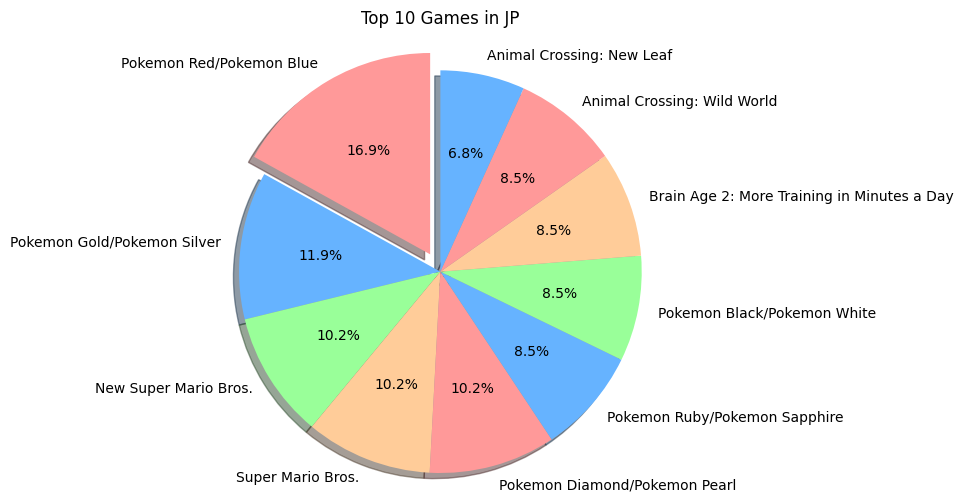

In [64]:
# Extract labels (Names of games) and sizes (Total sales for each game)
top10_na_sales = sales[['Name', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False).head(10)

labels = top10_na_sales['Name']
sizes = top10_na_sales['JP_Sales']

# 'Explode' the first slice only
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = [0.1] + [0] * (len(labels) - 1) # 'Explode' the first slice only

# Creating the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Display the chart
plt.title('Top 10 Games in JP')
plt.show()# Extract labels (Names of games) and sizes (Total sales for each game)


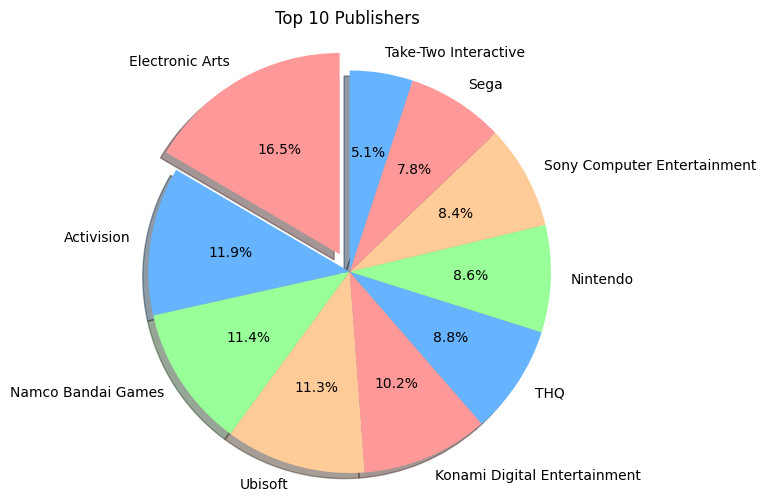

In [48]:
# Extract publisher name and publisher count
publisher = sales['Publisher'].value_counts()
publisher_count = publisher.head(10)

labels = publisher_count.index
sizes = publisher_count.values

# 'Explode' the first slice only
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = [0.1] + [0] * (len(labels) - 1) # 'Explode' the first slice only

# Creating the pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Display the chart
plt.title('Top 10 Publishers ')
plt.show()